PROJECT - 3: ANALYZE AND PREDICT CUSTOMER SATISFACTION IN RESTAURANTS

In [2]:
#While working on EDA (Exploratory Data Analysis) projects, we typically follow certain steps. 
#The initial step involves collecting the data.
#Then the task goes on
#Step-1 : Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Step-2: Loading the data
data = pd.read_csv(r"C:\Users\aniketh\Downloads\archive3\restaurant_customer_satisfaction.csv")

In [4]:
#Step-3: Displaying basic information
data.head() # we get the first five values

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


In [5]:
data.tail() # we get the last five values

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
1495,2149,39,Male,114857,Monthly,163.015254,American,Lunch,2,Business,Dine-in,0,1,1,7.206275,1,2,1,0
1496,2150,37,Female,133506,Weekly,190.991911,Italian,Lunch,4,Casual,Takeaway,0,0,0,37.863952,5,2,2,0
1497,2151,46,Male,119159,Monthly,150.088604,American,Lunch,4,Casual,Dine-in,0,1,0,3.925785,3,3,3,1
1498,2152,24,Male,27970,Weekly,196.363626,Italian,Dinner,6,Casual,Dine-in,1,1,0,24.228038,2,2,4,1
1499,2153,51,Male,148333,Weekly,171.119498,Chinese,Breakfast,4,Casual,Dine-in,1,1,1,39.402163,4,5,4,1


In [6]:
data.shape # we get the output, containing the data shape, as : (number of rows, number of columns)

(1500, 19)

In [8]:
data.info()#we get the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

In [9]:
data.describe()#we get the statistical information

,CustomerID,Age,Income,AverageSpend,GroupSize,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1403.500000,43.832000,85921.890000,105.659004,5.035333,0.296667,0.405333,0.480000,30.163550,3.044000,2.997333,2.987333,0.134000
std,433.157015,14.967157,38183.051749,52.381849,2.558864,0.456941,0.491120,0.499766,17.214184,1.423405,1.418920,1.450716,0.340766
min,654.000000,18.000000,20012.000000,10.306127,1.000000,0.000000,0.000000,0.000000,0.001380,1.000000,1.000000,1.000000,0.000000
25%,1028.750000,31.750000,52444.000000,62.287907,3.000000,0.000000,0.000000,0.000000,15.235423,2.000000,2.000000,2.000000,0.000000
50%,1403.500000,44.000000,85811.000000,104.626408,5.000000,0.000000,0.000000,0.000000,30.044055,3.000000,3.000000,3.000000,0.000000
75%,1778.250000,57.000000,119159.250000,148.649330,7.000000,1.000000,1.000000,1.000000,45.285649,4.000000,4.000000,4.000000,0.000000
max,2153.000000,69.000000,149875.000000,199.973527,9.000000,1.000000,1.000000,1.000000,59.970762,5.000000,5.000000,5.000000,1.000000


In [10]:
data.isnull()# we get the null values

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isna().sum()#we get the null values as a sum, for better analysis
#we can use 'isnull()' also, they both possess the same output

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

In [12]:
#Here we don't have any null values, so we do not have to clean the data but we must check for duplicate values

In [13]:
duplicates = data[data.duplicated()]
# Display duplicate rows
print(duplicates)

Empty DataFrame
Columns: [CustomerID, Age, Gender, Income, VisitFrequency, AverageSpend, PreferredCuisine, TimeOfVisit, GroupSize, DiningOccasion, MealType, OnlineReservation, DeliveryOrder, LoyaltyProgramMember, WaitTime, ServiceRating, FoodRating, AmbianceRating, HighSatisfaction]
Index: []


In [14]:
#Since we got duplicates, we must remove them 
dup=data.drop_duplicates(inplace=True)
print(dup)

None


[[<Axes: title={'center': 'CustomerID'}> <Axes: title={'center': 'Age'}>
  <Axes: title={'center': 'Income'}>
  <Axes: title={'center': 'AverageSpend'}>]
 [<Axes: title={'center': 'GroupSize'}>
  <Axes: title={'center': 'OnlineReservation'}>
  <Axes: title={'center': 'DeliveryOrder'}>
  <Axes: title={'center': 'LoyaltyProgramMember'}>]
 [<Axes: title={'center': 'WaitTime'}>
  <Axes: title={'center': 'ServiceRating'}>
  <Axes: title={'center': 'FoodRating'}>
  <Axes: title={'center': 'AmbianceRating'}>]
 [<Axes: title={'center': 'HighSatisfaction'}> <Axes: > <Axes: > <Axes: >]]


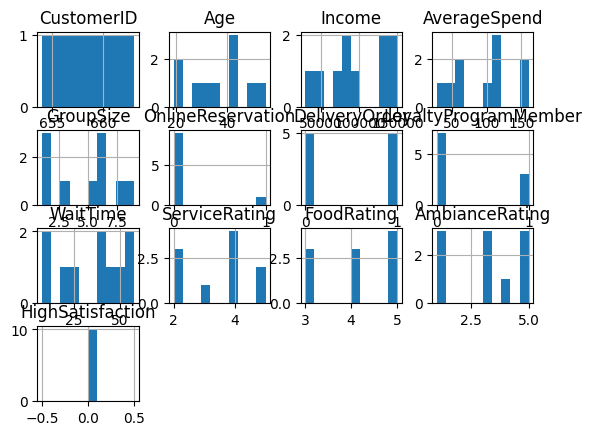

In [19]:
# Step-4 : We will now analyze the data
#Getting histogram based on the first 10 values and last 10 values
print(data.head(10).hist())

[[<Axes: title={'center': 'CustomerID'}> <Axes: title={'center': 'Age'}>
  <Axes: title={'center': 'Income'}>
  <Axes: title={'center': 'AverageSpend'}>]
 [<Axes: title={'center': 'GroupSize'}>
  <Axes: title={'center': 'OnlineReservation'}>
  <Axes: title={'center': 'DeliveryOrder'}>
  <Axes: title={'center': 'LoyaltyProgramMember'}>]
 [<Axes: title={'center': 'WaitTime'}>
  <Axes: title={'center': 'ServiceRating'}>
  <Axes: title={'center': 'FoodRating'}>
  <Axes: title={'center': 'AmbianceRating'}>]
 [<Axes: title={'center': 'HighSatisfaction'}> <Axes: > <Axes: > <Axes: >]]


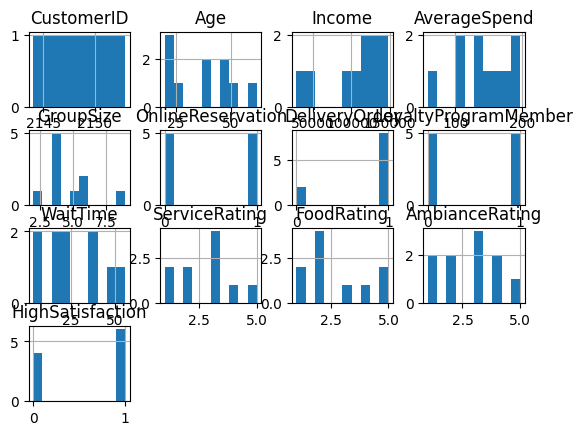

In [20]:
print(data.tail(10).hist())

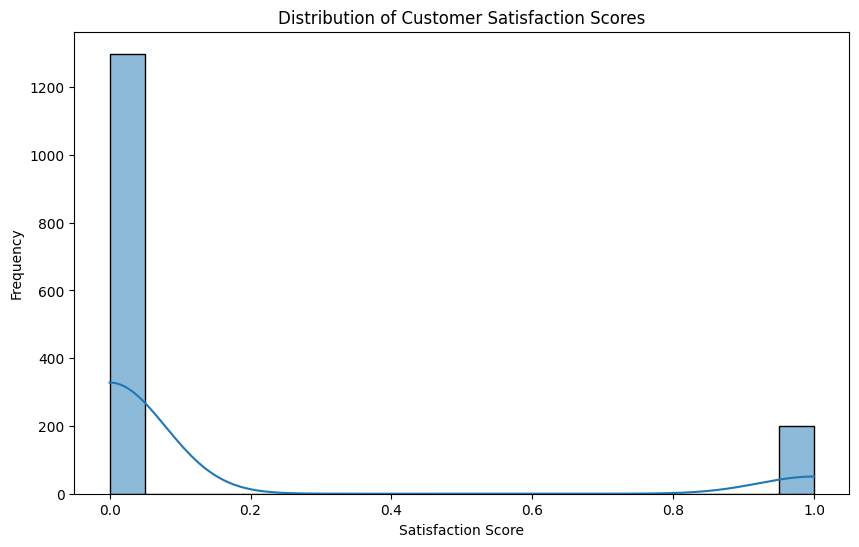

In [21]:
# Plot distribution of satisfaction scores
plt.figure(figsize=(10, 6))
sns.histplot(data['HighSatisfaction'], bins=20, kde=True)
plt.title('Distribution of Customer Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

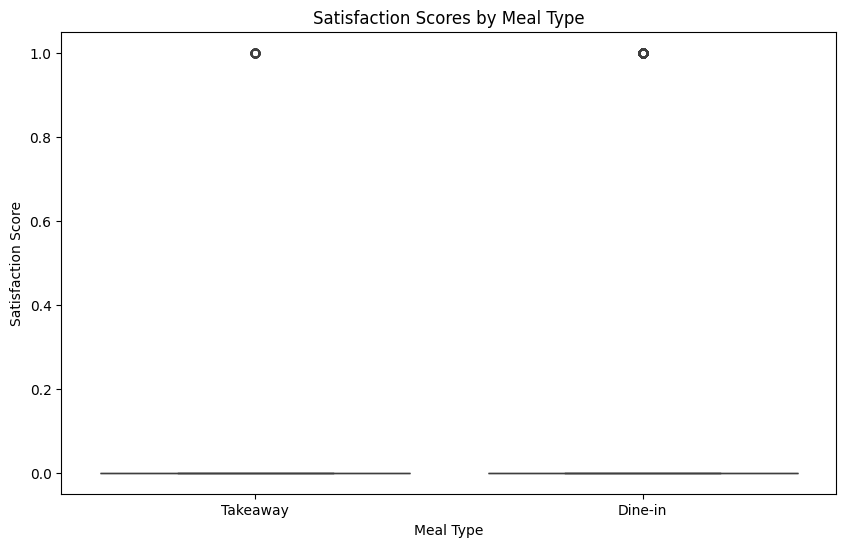

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MealType', y='HighSatisfaction', data=data)
plt.title('Satisfaction Scores by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Satisfaction Score')
plt.show()


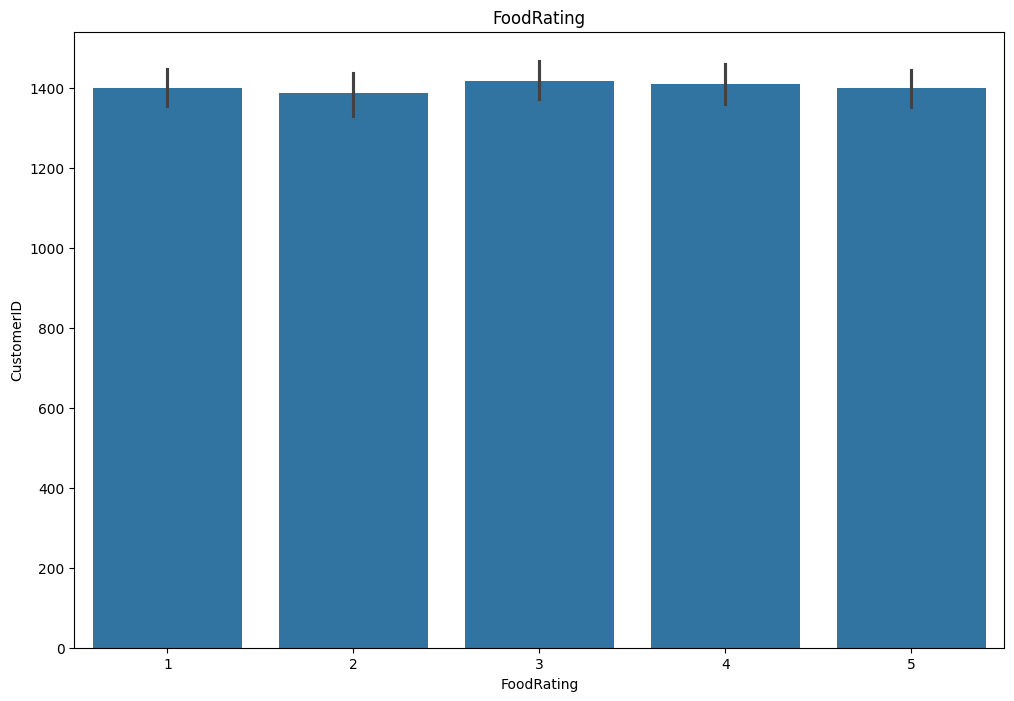

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x='FoodRating', y='CustomerID', data=data)
plt.title('FoodRating')
plt.show()

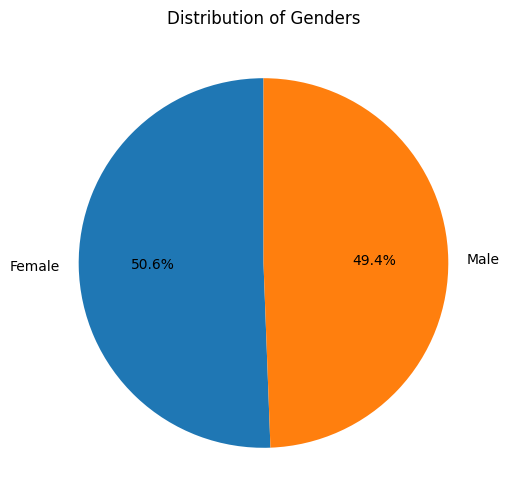

In [36]:
# Plot pie chart for gender distribution
# Count occurrences of each gender
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genders')
plt.show()